In [1]:
from google.colab import drive
drive.mount('/content/drive')

! git clone https://github.com/neighbornixon/Titanic.git

Mounted at /content/drive
Cloning into 'Titanic'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 20 (delta 5), reused 8 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 84.70 KiB | 3.26 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [4]:
df = pd.read_csv('Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


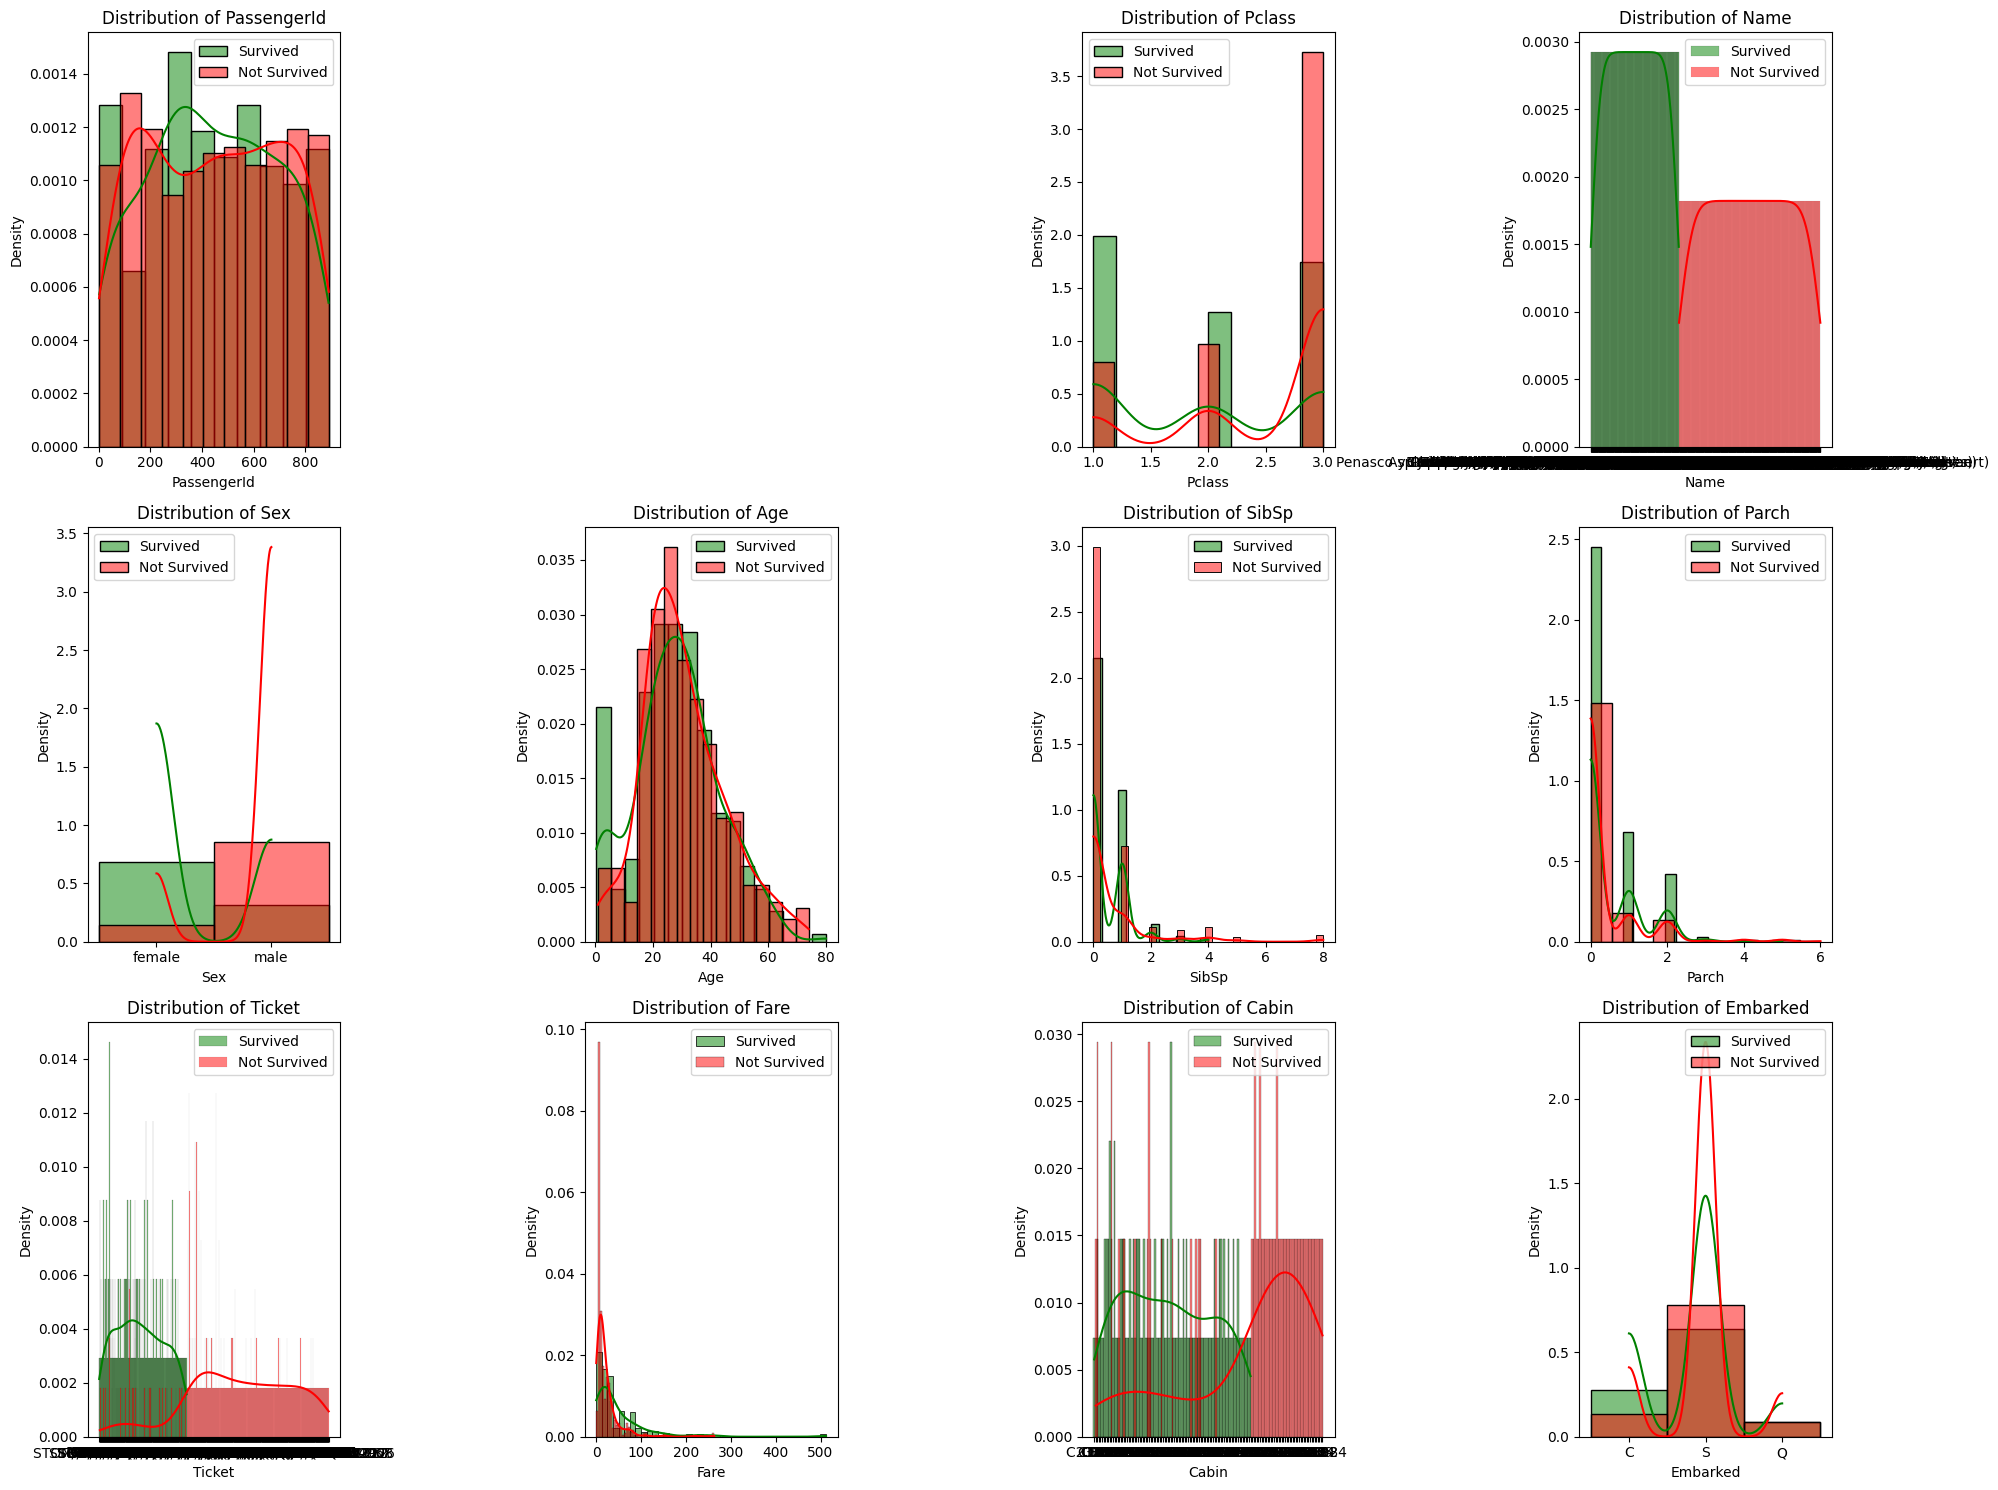

In [6]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

# Set the figure size for better visibility
plt.figure(figsize=(20, 15))

# Loop through the variables (assuming they are numerical)
for i, column in enumerate(df.columns):
    if column != 'Survived':  # Exclude the 'Survived' column itself from plotting
        plt.subplot(3, 4, i + 1)  # Create a subplot grid
        sns.histplot(survived[column], label='Survived', color='green', kde=True, stat="density")
        sns.histplot(not_survived[column], label='Not Survived', color='red', kde=True, stat="density")
        plt.legend()
        plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

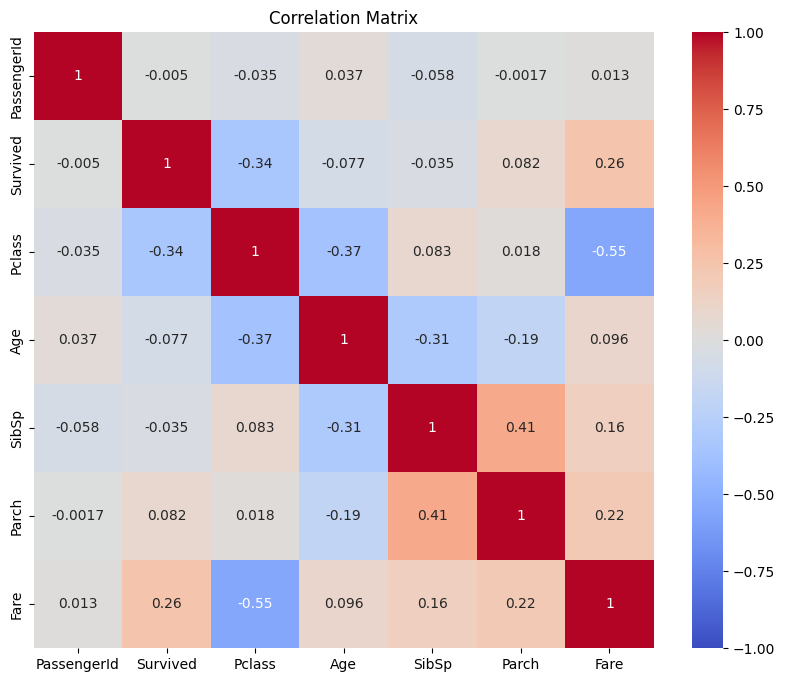

In [22]:
# Compute correlation matrix

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [24]:
# If the p-value is low (typically < 0.05), the feature is significantly associated with survival.
for column in df.select_dtypes(include='object'):  # Assuming categorical features are object type
    contingency_table = pd.crosstab(df[column], df['Survived'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    if p >= 0.05:
      print(f'Feature: {column}, p-value: {p:.3f}')
    else:
      print(f'!!Feature: {column} is heavily related with Survival!!')

Feature: Name, p-value: 0.484
!!Feature: Sex is heavily related with Survival!!
!!Feature: Ticket is heavily related with Survival!!
Feature: Cabin, p-value: 0.184
!!Feature: Embarked is heavily related with Survival!!


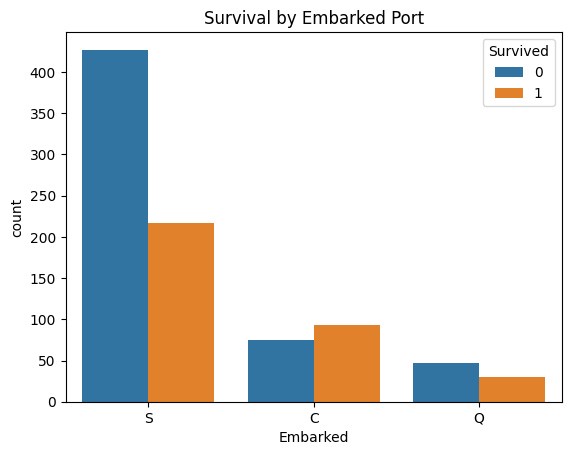

In [26]:
# Plot count of passengers by Embarked and Survival status
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked Port')
plt.show()

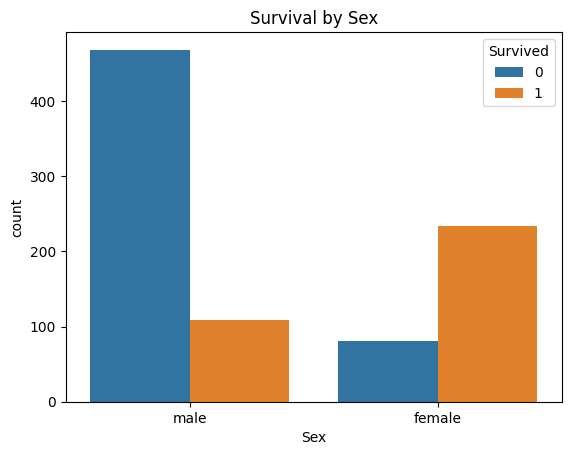

In [27]:
# Plot count of passengers by Sex and Survival status
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

Ticket
110152    1.0
26360     1.0
386525    1.0
382651    1.0
244373    1.0
Name: Survived, dtype: float64


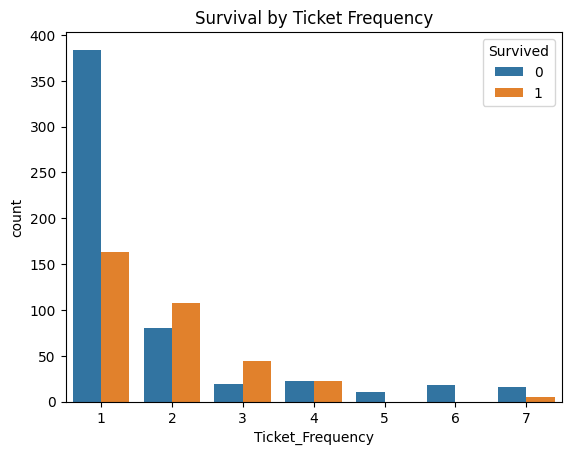

In [29]:
# Group by Ticket and calculate survival rate for each ticket group
survival_rate_by_ticket = df.groupby('Ticket')['Survived'].mean()

# Sort and display the top few tickets by survival rate
print(survival_rate_by_ticket.sort_values(ascending=False).head())

df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')

# Plot survival by ticket frequency
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df)
plt.title('Survival by Ticket Frequency')
plt.show()

Sex, Ticket, and Embarked are all important features. Is name potentially Useless?